**CUSTOM DATASET CNN**

In [1]:
import torch
from torch import nn

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Get data

In [3]:
import os
from pathlib import Path

In [4]:
image_path = Path(r"E:\PyTorch\Cats")

In [5]:
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}")

In [6]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'E:\PyTorch\Cats
There are 12 directories and 0 images in 'E:\PyTorch\Cats\Test
There are 0 directories and 39 images in 'E:\PyTorch\Cats\Test\Abyssinian
There are 0 directories and 39 images in 'E:\PyTorch\Cats\Test\Bengal
There are 0 directories and 39 images in 'E:\PyTorch\Cats\Test\Birman
There are 0 directories and 39 images in 'E:\PyTorch\Cats\Test\Bombay
There are 0 directories and 39 images in 'E:\PyTorch\Cats\Test\British_Shorthair
There are 0 directories and 39 images in 'E:\PyTorch\Cats\Test\Egyptian_Mau
There are 0 directories and 39 images in 'E:\PyTorch\Cats\Test\Maine_Coon
There are 0 directories and 39 images in 'E:\PyTorch\Cats\Test\Persian
There are 0 directories and 39 images in 'E:\PyTorch\Cats\Test\Ragdoll
There are 0 directories and 39 images in 'E:\PyTorch\Cats\Test\Russian_Blue
There are 0 directories and 39 images in 'E:\PyTorch\Cats\Test\Siamese
There are 0 directories and 39 images in 'E:\PyTorch\Cats\Test\Sphynx
There 

In [7]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('E:/PyTorch/Cats/train'), WindowsPath('E:/PyTorch/Cats/test'))

Random imsge path: E:\PyTorch\Cats\Train\British_Shorthair\Birtish_Shorthair (28).jpg
Image class: British_Shorthair
Image height: 500
Image width: 333


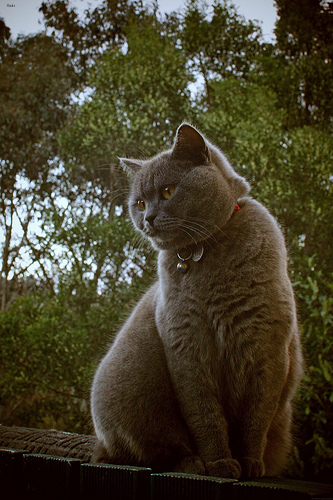

In [8]:
import random 
from PIL import Image

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img =Image.open(random_image_path)

print(f"Random imsge path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(np.float64(-0.5), np.float64(332.5), np.float64(499.5), np.float64(-0.5))

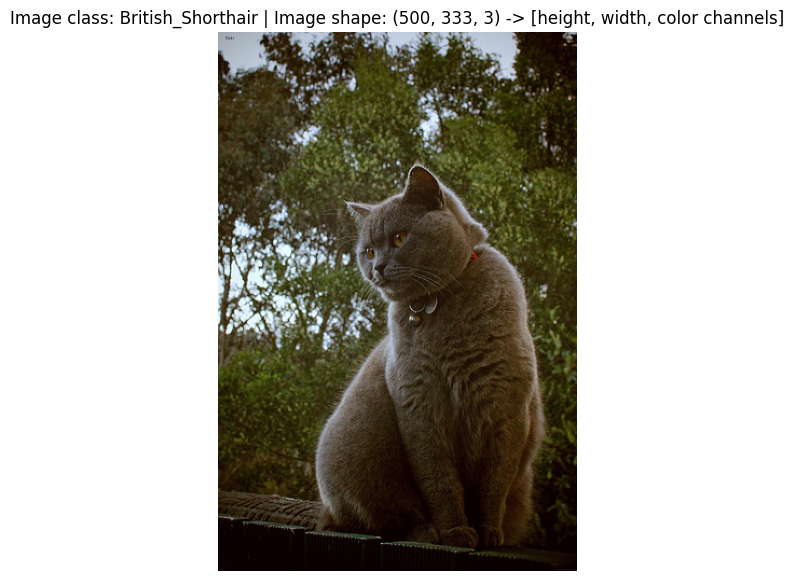

In [9]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color channels]")
plt.axis(False)

In [10]:
img_as_array

array([[[161, 168, 178],
        [156, 163, 173],
        [160, 167, 177],
        ...,
        [160, 159, 175],
        [155, 153, 166],
        [146, 148, 161]],

       [[160, 167, 177],
        [159, 166, 176],
        [161, 168, 178],
        ...,
        [162, 166, 175],
        [134, 130, 129],
        [104, 105, 100]],

       [[160, 167, 177],
        [164, 171, 181],
        [161, 168, 178],
        ...,
        [ 85,  97,  87],
        [ 82,  81,  60],
        [ 63,  61,  38]],

       ...,

       [[ 12,   0,   0],
        [ 12,   0,   0],
        [ 12,   0,   0],
        ...,
        [ 11,   0,   0],
        [ 13,   1,   1],
        [  9,   0,   0]],

       [[ 12,   0,   0],
        [ 12,   0,   0],
        [ 12,   0,   0],
        ...,
        [ 24,  12,  12],
        [ 26,  14,  14],
        [ 20,  10,   9]],

       [[ 12,   0,   0],
        [ 12,   0,   0],
        [ 12,   0,   0],
        ...,
        [ 19,   7,   7],
        [ 19,   7,   7],
        [ 12,   2,   1]]

Transforming data

In [11]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [12]:
data_transform = transforms.Compose([
    transforms.Resize(size=(128,128)), #Resize img
    transforms.RandomHorizontalFlip(p=0.5), #Flip images randomly on the horizontal
    transforms.ToTensor() #Turn images into tensors
])

In [13]:
data_transform(img)

tensor([[[0.3333, 0.3882, 0.4980,  ..., 0.6275, 0.6353, 0.6314],
         [0.0863, 0.2392, 0.4706,  ..., 0.6078, 0.6431, 0.6392],
         [0.1765, 0.1843, 0.2392,  ..., 0.6588, 0.6549, 0.6510],
         ...,
         [0.0588, 0.0667, 0.0706,  ..., 0.0471, 0.0471, 0.0471],
         [0.0471, 0.0471, 0.0510,  ..., 0.0471, 0.0471, 0.0471],
         [0.0627, 0.0588, 0.0588,  ..., 0.0471, 0.0471, 0.0471]],

        [[0.3294, 0.3882, 0.4824,  ..., 0.6549, 0.6627, 0.6588],
         [0.0235, 0.1608, 0.4392,  ..., 0.6353, 0.6706, 0.6667],
         [0.0941, 0.1176, 0.1922,  ..., 0.6824, 0.6784, 0.6745],
         ...,
         [0.0078, 0.0118, 0.0157,  ..., 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0039, 0.0078,  ..., 0.0000, 0.0000, 0.0000],
         [0.0157, 0.0196, 0.0196,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.3216, 0.3882, 0.4902,  ..., 0.6941, 0.7020, 0.6980],
         [0.0196, 0.1255, 0.4196,  ..., 0.6745, 0.7098, 0.7059],
         [0.0706, 0.0627, 0.1373,  ..., 0.7255, 0.7216, 0.

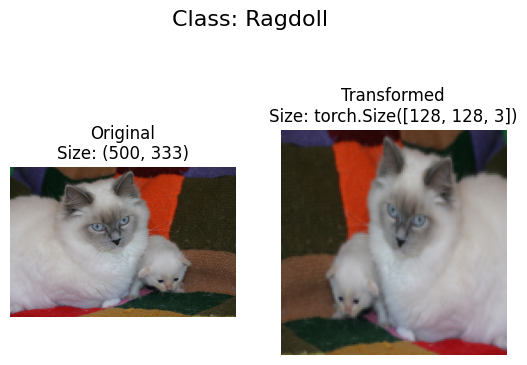

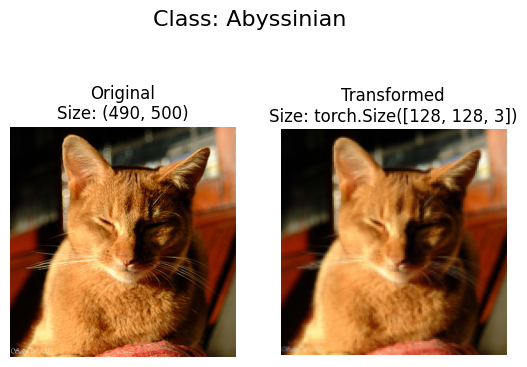

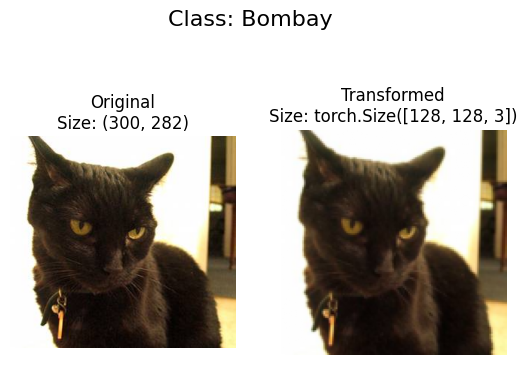

In [14]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)
            transformed_image = transform(f).permute(1, 2, 0) #(c,h,w) -> (h,w,c)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nSize: {transformed_image.shape}")
            ax[1].axis("off")
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3)

Loading image data 

In [15]:
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 1872
     Root location: E:\PyTorch\Cats\train
     StandardTransform
 Transform: Compose(
                Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 468
     Root location: E:\PyTorch\Cats\test
     StandardTransform
 Transform: Compose(
                Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [16]:
class_names = train_data.classes
class_names

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx']

In [17]:
class_dict = train_data.class_to_idx
class_dict

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11}

In [18]:
len(train_data), len(test_data)

(1872, 468)

In [19]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape:\n {img.shape}")
print(f"Image dtype:\n {img.dtype}")
print(f"Image label:\n {label}")
print(f"Label dtype:\n {type(label)}")

Image tensor:
 tensor([[[0.0196, 0.0235, 0.0235,  ..., 0.2157, 0.2157, 0.2118],
         [0.0157, 0.0157, 0.0118,  ..., 0.1961, 0.1922, 0.1882],
         [0.0039, 0.0039, 0.0039,  ..., 0.0745, 0.0706, 0.0667],
         ...,
         [0.1098, 0.1137, 0.1137,  ..., 0.1647, 0.2118, 0.2196],
         [0.0902, 0.0941, 0.0941,  ..., 0.2353, 0.2314, 0.2118],
         [0.0980, 0.0980, 0.0941,  ..., 0.2196, 0.2000, 0.1765]],

        [[0.0196, 0.0157, 0.0157,  ..., 0.2392, 0.2392, 0.2314],
         [0.0157, 0.0118, 0.0118,  ..., 0.2157, 0.2078, 0.2039],
         [0.0039, 0.0039, 0.0039,  ..., 0.0745, 0.0667, 0.0627],
         ...,
         [0.0863, 0.0902, 0.0902,  ..., 0.2118, 0.2745, 0.2941],
         [0.0745, 0.0745, 0.0745,  ..., 0.3020, 0.2980, 0.2824],
         [0.0784, 0.0784, 0.0745,  ..., 0.2863, 0.2745, 0.2392]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.2392, 0.2392, 0.2314],
         [0.0157, 0.0157, 0.0078,  ..., 0.2078, 0.2039, 0.2000],
         [0.0039, 0.0039, 0.0039,  ..., 0.0

Original shape: torch.Size([3, 128, 128]) -> [color_channels, height, width]
Image permute: torch.Size([128, 128, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'Abyssinian')

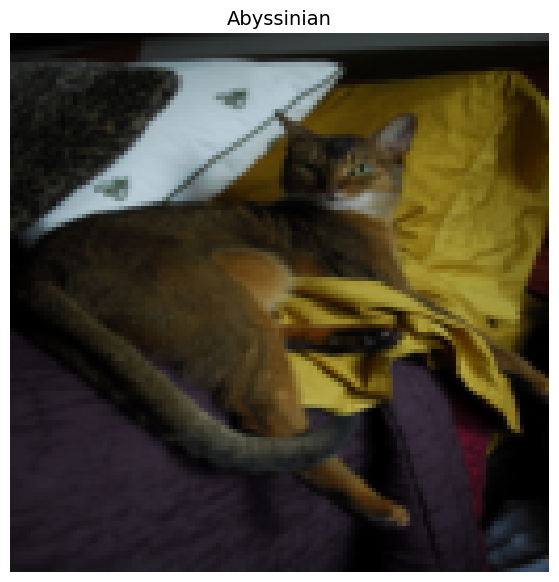

In [20]:
img_permute = img.permute(1, 2, 0)

print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute: {img_permute.shape} -> [height, width, color_channels]")

plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

In [21]:
from torch.utils.data import DataLoader

In [22]:
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=False)

In [23]:
len(train_dataloader), len(test_dataloader)

(1872, 468)

In [24]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 128, 128]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


Other method without using ImageFolder

In [25]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [26]:
#Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['Abyssinian',
  'Bengal',
  'Birman',
  'Bombay',
  'British_Shorthair',
  'Egyptian_Mau',
  'Maine_Coon',
  'Persian',
  'Ragdoll',
  'Russian_Blue',
  'Siamese',
  'Sphynx'],
 {'Abyssinian': 0,
  'Bengal': 1,
  'Birman': 2,
  'Bombay': 3,
  'British_Shorthair': 4,
  'Egyptian_Mau': 5,
  'Maine_Coon': 6,
  'Persian': 7,
  'Ragdoll': 8,
  'Russian_Blue': 9,
  'Siamese': 10,
  'Sphynx': 11})

In [27]:
#Setup path for target directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

#Get the class names from the target directory
class_names_found = sorted(entry.name for entry in list(os.scandir(target_directory)))
class_names_found

Target dir: E:\PyTorch\Cats\train


['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx']

In [28]:
list(os.scandir(target_directory))

[<DirEntry 'Abyssinian'>,
 <DirEntry 'Bengal'>,
 <DirEntry 'Birman'>,
 <DirEntry 'Bombay'>,
 <DirEntry 'British_Shorthair'>,
 <DirEntry 'Egyptian_Mau'>,
 <DirEntry 'Maine_Coon'>,
 <DirEntry 'Persian'>,
 <DirEntry 'Ragdoll'>,
 <DirEntry 'Russian_Blue'>,
 <DirEntry 'Siamese'>,
 <DirEntry 'Sphynx'>]

In [29]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    #Get the class names by scanning directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    #Raise an error if class names couldnt be found
    if not classes:
        raise FileNotFoundError(f"Couldnt find any classes in {directory}")
    #Create a dictionary of index labels
    class_to_idx = {class_names: i for i, class_names in enumerate(classes)}
    return classes, class_to_idx

In [30]:
find_classes(target_directory)

(['Abyssinian',
  'Bengal',
  'Birman',
  'Bombay',
  'British_Shorthair',
  'Egyptian_Mau',
  'Maine_Coon',
  'Persian',
  'Ragdoll',
  'Russian_Blue',
  'Siamese',
  'Sphynx'],
 {'Abyssinian': 0,
  'Bengal': 1,
  'Birman': 2,
  'Bombay': 3,
  'British_Shorthair': 4,
  'Egyptian_Mau': 5,
  'Maine_Coon': 6,
  'Persian': 7,
  'Ragdoll': 8,
  'Russian_Blue': 9,
  'Siamese': 10,
  'Sphynx': 11})

In [31]:
#Write a custom dataset class
from torch.utils.data import Dataset

#Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    #Initialize our custom dataset
    def __init__(self,
                 targ_dir: str,
                 transform=None):
        #Create class attributes
        #Get all of the image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        #Setup transforms
        self.transform = transform
        #Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)
    
    #Create a function to load images
    def load_image(self, index: int) -> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path)
    
    #Overwrite __len__()
    def __len__(self) -> int:
        return len(self.paths)
    
    #Overwrite __getitem__() method to return a particular sample
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        img = self.load_image(index)
        class_name = self.paths[index].parent.name #expects path in format: data_folder/class_name/image.jpg
        class_idx = self.class_to_idx[class_name]

        #Transform if necessary
        if self.transform:
            return self.transform(img), class_idx #return data, label (X, y)
        else:
            return img, class_idx #return untransformed image and label

In [32]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize(size=(128,128)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(128,128)),
    transforms.ToTensor()
])

In [33]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                      transform=test_transforms)

train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x16ca5ed1d90>,
 <__main__.ImageFolderCustom at 0x16ca5ed2000>)

In [34]:
len(train_data), len(train_data_custom)

(1872, 1872)

In [35]:
len(test_data), len(test_data_custom)

(468, 468)

In [36]:
train_data_custom.class_to_idx

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11}

In [37]:
print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)

True
True


In [38]:
#Function to display random images
#Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int=10,
                          display_shape: bool = True,
                          seed: int = None):
    #Adjust display if n is too high
    if n > 10:
        n=10
        display_shape = False
        print(f"For display purposes, n shouldnt be larger than 10, setting n to 10 and removing shape display.")
    #Set the seed
    if seed:
        random.seed(seed)
    #Get random samples indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)
    #Setup plot
    plt.figure(figsize=(16, 8))
    #Loop through random indexes and plot them with matplotlib
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample]
        #Adjust tensor dimensions for plotting
        targ_image_adjust = targ_image.permute(1, 2, 0) # [color_channels, height, width] -> [height, width, color_channels]
        #Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"Class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nShape: {targ_image_adjust.shape}"
        plt.title(title)

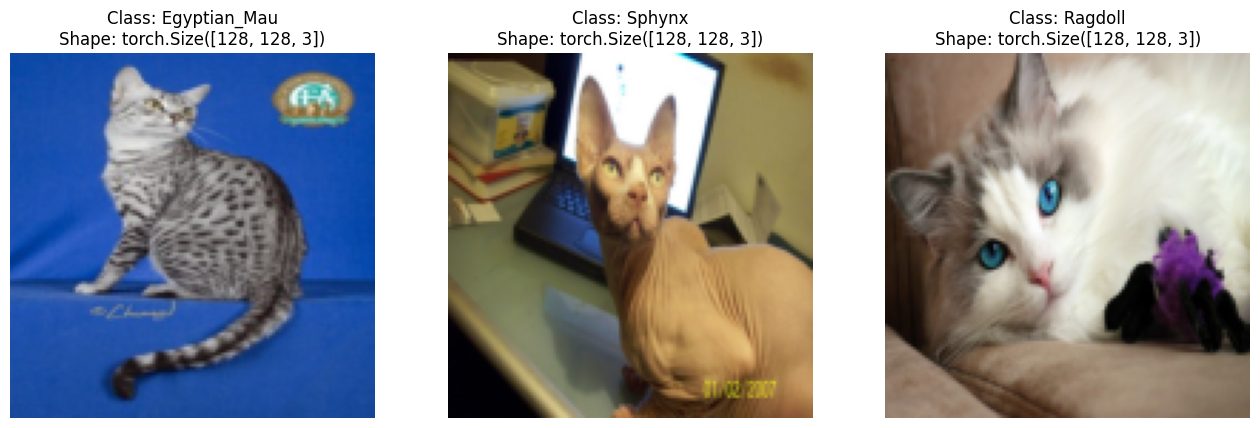

In [39]:
display_random_images(train_data,
                      n=3,
                      classes=class_names,
                      seed=None)

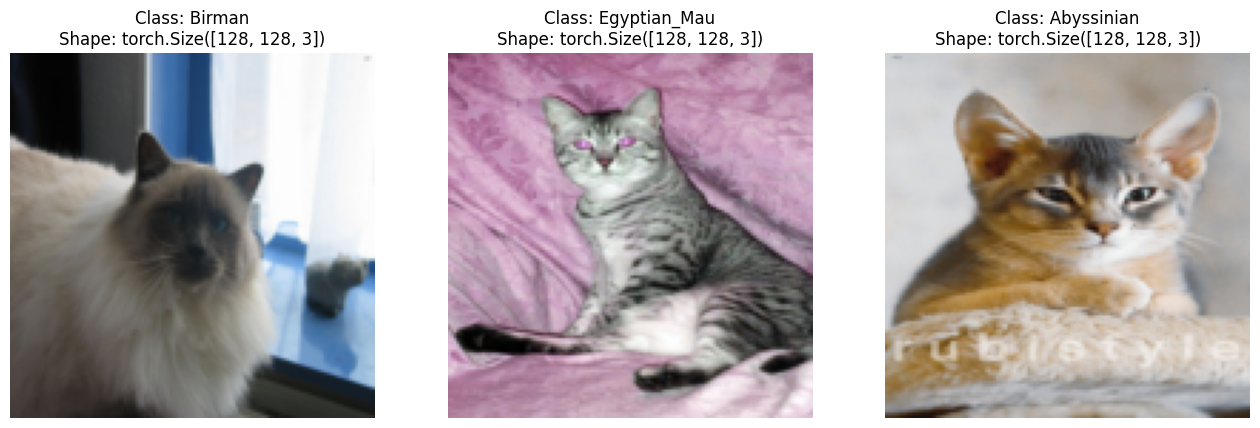

In [40]:
display_random_images(train_data_custom,
                      n=3,
                      classes=class_names,
                      seed=None)

In [41]:
#Turn custom loaded images into DataLoaders

from torch.utils.data import DataLoader

BATCH_SIZE = 1

train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=0,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=0,
                                     shuffle=False)

In [42]:
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x16ca60d54f0>,
 <torch.utils.data.dataloader.DataLoader at 0x16ca607ed80>)

In [43]:
#Get img and label from custom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))

img_custom.shape

torch.Size([1, 3, 128, 128])

Other forms of transforms (data augmentation)

In [44]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize(size=(128, 128)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(128, 128)),
    transforms.ToTensor()
])

In [45]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[WindowsPath('E:/PyTorch/Cats/Test/Abyssinian/Abyssinian (157).jpg'),
 WindowsPath('E:/PyTorch/Cats/Test/Abyssinian/Abyssinian (158).jpg'),
 WindowsPath('E:/PyTorch/Cats/Test/Abyssinian/Abyssinian (159).jpg'),
 WindowsPath('E:/PyTorch/Cats/Test/Abyssinian/Abyssinian (160).jpg'),
 WindowsPath('E:/PyTorch/Cats/Test/Abyssinian/Abyssinian (161).jpg'),
 WindowsPath('E:/PyTorch/Cats/Test/Abyssinian/Abyssinian (162).jpg'),
 WindowsPath('E:/PyTorch/Cats/Test/Abyssinian/Abyssinian (163).jpg'),
 WindowsPath('E:/PyTorch/Cats/Test/Abyssinian/Abyssinian (164).jpg'),
 WindowsPath('E:/PyTorch/Cats/Test/Abyssinian/Abyssinian (165).jpg'),
 WindowsPath('E:/PyTorch/Cats/Test/Abyssinian/Abyssinian (166).jpg')]

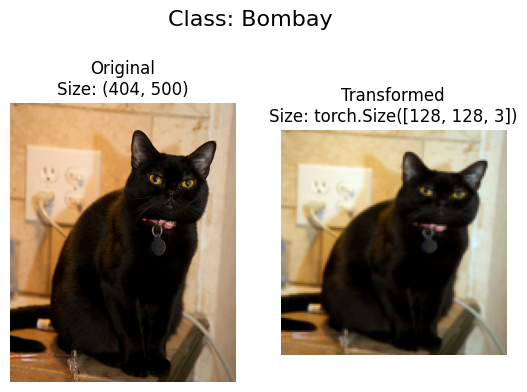

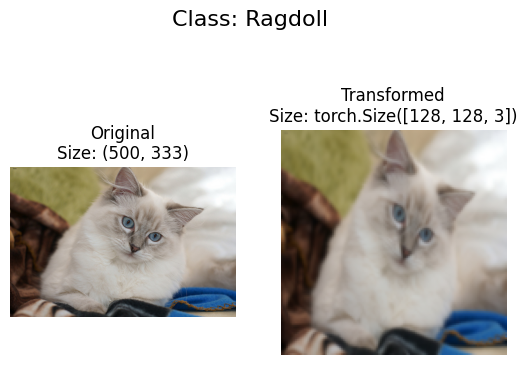

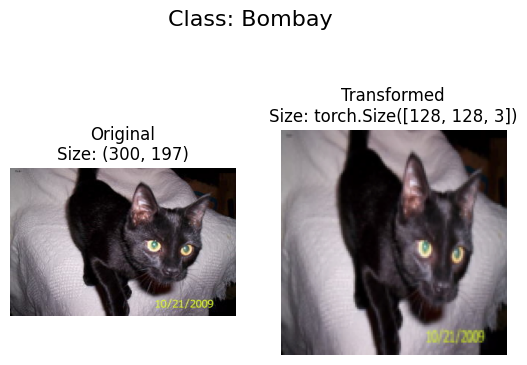

In [46]:
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=3,
    seed=None
)

Making baseline model

In [47]:
#Create simple transform
simple_transform = transforms.Compose([
    transforms.Resize(size=(128,128)),
    transforms.ToTensor()
])

In [48]:
#Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

#Turn the datasets into dataloaders
import os 
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

#Create dataloaders
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=False,
                                     num_workers=NUM_WORKERS)

In [49]:
#Create TinyVGG modelclass
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        print(x.shape)
        x = self.conv_block_2(x)
        print(x.shape)
        x = self.classifier(x)
        print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) -> Benefits from operator fusion

In [50]:
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10, out_features=12, bias=True)
  )
)

In [51]:
#Try forward pass on single img (to test model)

image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

In [52]:
model_0(image_batch.to(device))

torch.Size([32, 10, 64, 64])
torch.Size([32, 10, 32, 32])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x10240 and 10x12)

In [53]:
10*32*32

10240

In [54]:
#Create TinyVGG modelclass
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*32*32,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        print(x.shape)
        x = self.conv_block_2(x)
        print(x.shape)
        x = self.classifier(x)
        print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) -> Benefits from operator fusion

In [55]:
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10240, out_features=12, bias=True)
  )
)

In [56]:
model_0(image_batch.to(device))

torch.Size([32, 10, 64, 64])
torch.Size([32, 10, 32, 32])
torch.Size([32, 12])


tensor([[ 0.0182, -0.0330, -0.0101, -0.0357,  0.0595,  0.0028, -0.0249, -0.0883,
         -0.0914,  0.0370, -0.0401,  0.0104],
        [ 0.0132, -0.0423, -0.0043, -0.0286,  0.0719,  0.0050, -0.0358, -0.0947,
         -0.0958,  0.0510, -0.0386,  0.0129],
        [ 0.0213, -0.0329, -0.0131, -0.0286,  0.0643, -0.0099, -0.0377, -0.0898,
         -0.0934,  0.0400, -0.0333,  0.0198],
        [ 0.0173, -0.0307, -0.0171, -0.0352,  0.0724, -0.0057, -0.0186, -0.0804,
         -0.1107,  0.0338, -0.0294, -0.0004],
        [ 0.0328, -0.0489, -0.0185, -0.0514,  0.0884, -0.0232, -0.0192, -0.0895,
         -0.1269,  0.0431, -0.0103,  0.0050],
        [ 0.0257, -0.0269, -0.0212, -0.0469,  0.0710, -0.0129, -0.0088, -0.0984,
         -0.1173,  0.0499, -0.0278, -0.0049],
        [ 0.0213, -0.0342, -0.0177, -0.0341,  0.0692,  0.0006, -0.0217, -0.0821,
         -0.1012,  0.0363, -0.0347,  0.0101],
        [ 0.0213, -0.0393, -0.0140, -0.0305,  0.0647, -0.0139, -0.0108, -0.0800,
         -0.1268,  0.0263, -0.

In [57]:
#Create TinyVGG modelclass
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*32*32,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        print(x.shape)
        x = self.conv_block_2(x)
        print(x.shape)
        x = self.classifier(x)
        print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) -> Benefits from operator fusion

In [58]:
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10240, out_features=12, bias=True)
  )
)

In [59]:
model_0(image_batch.to(device))

torch.Size([32, 10, 62, 62])
torch.Size([32, 10, 29, 29])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x8410 and 10240x12)

In [60]:
10*29*29

8410

In [61]:
#Create TinyVGG modelclass
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*29*29,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        print(x.shape)
        x = self.conv_block_2(x)
        print(x.shape)
        x = self.classifier(x)
        print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) -> Benefits from operator fusion

In [62]:
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=8410, out_features=12, bias=True)
  )
)

In [63]:
model_0(image_batch.to(device))

torch.Size([32, 10, 62, 62])
torch.Size([32, 10, 29, 29])
torch.Size([32, 12])


tensor([[-1.2626e-02,  1.2531e-02, -1.7209e-02, -4.8718e-03, -3.4272e-03,
         -7.7479e-03, -1.2092e-02, -6.2356e-03,  3.7050e-03,  8.4142e-03,
          9.2245e-03, -1.0173e-02],
        [-9.5106e-03,  1.7856e-02, -8.4122e-03, -1.5283e-02, -3.8205e-03,
         -2.7983e-03, -1.6835e-02, -9.8548e-04, -2.4508e-03,  2.7123e-03,
         -6.7765e-04, -9.2465e-03],
        [-7.8904e-03, -1.3830e-03, -1.6295e-02,  4.0832e-03,  5.9610e-03,
         -7.7783e-03, -2.8108e-03, -3.0336e-03, -7.0558e-03,  9.5400e-03,
          1.7635e-02,  3.7132e-03],
        [-1.9927e-02,  4.0474e-04, -7.6792e-03, -3.4621e-03, -8.5102e-03,
          4.9128e-04, -9.1568e-03,  9.1986e-04,  2.8359e-03,  6.0973e-03,
          4.4296e-03, -1.4433e-03],
        [-1.2863e-02,  1.0575e-02, -1.0370e-02, -5.9674e-03,  1.4403e-03,
         -6.3628e-03, -1.0213e-02,  6.7207e-03, -9.7305e-03,  7.6873e-03,
          7.3637e-03, -1.5582e-04],
        [-1.1839e-02,  1.3495e-02, -1.2516e-02, -7.3166e-04, -4.7157e-04,
      

In [64]:
#Create TinyVGG modelclass
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*29*29,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) -> Benefits from operator fusion

In [65]:
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=8410, out_features=12, bias=True)
  )
)

In [66]:
#Use torchinfo to get an idea of the shapes going through model

from torchinfo import summary
summary(model_0, input_size=[1, 3, 224, 224])

RuntimeError: Failed to run torchinfo. See above stack traces for more details. Executed layers up to: [Sequential: 1, Conv2d: 2, ReLU: 2, Conv2d: 2, ReLU: 2, MaxPool2d: 2, Sequential: 1, Conv2d: 2, ReLU: 2, Conv2d: 2, ReLU: 2, MaxPool2d: 2, Flatten: 2]

In [67]:
#Use torchinfo to get an idea of the shapes going through model

from torchinfo import summary
summary(model_0, input_size=[1, 3, 128, 128])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 12]                   --
├─Sequential: 1-1                        [1, 10, 62, 62]           --
│    └─Conv2d: 2-1                       [1, 10, 126, 126]         280
│    └─ReLU: 2-2                         [1, 10, 126, 126]         --
│    └─Conv2d: 2-3                       [1, 10, 124, 124]         910
│    └─ReLU: 2-4                         [1, 10, 124, 124]         --
│    └─MaxPool2d: 2-5                    [1, 10, 62, 62]           --
├─Sequential: 1-2                        [1, 10, 29, 29]           --
│    └─Conv2d: 2-6                       [1, 10, 60, 60]           910
│    └─ReLU: 2-7                         [1, 10, 60, 60]           --
│    └─Conv2d: 2-8                       [1, 10, 58, 58]           910
│    └─ReLU: 2-9                         [1, 10, 58, 58]           --
│    └─MaxPool2d: 2-10                   [1, 10, 29, 29]           --
├─Sequentia

In [68]:
from helper_functions_2 import test_step, train_step, accuracy_fn

c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [69]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn,
          accuracy_fn,
          epochs: int=5,
          device=device):
    #Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}
    
    #Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           data_loader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           accuracy_fn=accuracy_fn,
                                           device=device)
        test_loss, test_acc = test_step(model=model,
                                        data_loader=test_dataloader,
                                        loss_fn=loss_fn,
                                        accuracy_fn=accuracy_fn,
                                        device=device)
        
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}")
        
        #Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
 
    #Return the filled results at the end of the epochs
    return results

In [70]:
#Set number of epochs
NUM_EPOCHS = 5 

#Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

#Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

#Start the timer
from timeit import default_timer as Timer
start_time = Timer()

#Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        accuracy_fn=accuracy_fn,
                        epochs=NUM_EPOCHS)

#End the timer and print out how long it took
end_time = Timer()
from helper_functions_2 import print_train_time
print_train_time(start=start_time,
                 end=end_time,
                 device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Looked at 0/1872 samples.
Train Loss: 2.421 | Train Acc: 14.04%


 20%|██        | 1/5 [01:03<04:13, 63.42s/it]

Test Loss: 2.358 | Test Acc: 18.96%
Epoch: 0 | Train Loss: 2.4207 | Train Acc: 14.04 | Test Loss: 2.3585 | Test Acc: 18.96
Looked at 0/1872 samples.
Train Loss: 2.218 | Train Acc: 22.83%


 40%|████      | 2/5 [02:01<03:01, 60.41s/it]

Test Loss: 2.274 | Test Acc: 22.71%
Epoch: 1 | Train Loss: 2.2178 | Train Acc: 22.83 | Test Loss: 2.2742 | Test Acc: 22.71
Looked at 0/1872 samples.
Train Loss: 2.098 | Train Acc: 28.76%


 60%|██████    | 3/5 [03:01<01:59, 59.90s/it]

Test Loss: 2.247 | Test Acc: 20.88%
Epoch: 2 | Train Loss: 2.0983 | Train Acc: 28.76 | Test Loss: 2.2469 | Test Acc: 20.88
Looked at 0/1872 samples.
Train Loss: 2.001 | Train Acc: 31.04%


 80%|████████  | 4/5 [04:02<01:00, 60.65s/it]

Test Loss: 2.199 | Test Acc: 27.50%
Epoch: 3 | Train Loss: 2.0006 | Train Acc: 31.04 | Test Loss: 2.1993 | Test Acc: 27.50
Looked at 0/1872 samples.
Train Loss: 1.893 | Train Acc: 36.97%


100%|██████████| 5/5 [05:02<00:00, 60.56s/it]

Test Loss: 2.196 | Test Acc: 26.50%
Epoch: 4 | Train Loss: 1.8928 | Train Acc: 36.97 | Test Loss: 2.1964 | Test Acc: 26.50
Train time on cuda: 302.838 seconds


302.8381381999934

In [71]:
model_0_results

{'train_loss': [tensor(2.4207, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(2.2178, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(2.0983, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(2.0006, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.8928, device='cuda:0', grad_fn=<DivBackward0>)],
 'train_acc': [14.036016949152541,
  22.828389830508474,
  28.760593220338983,
  31.03813559322034,
  36.970338983050844],
 'test_loss': [tensor(2.3585, device='cuda:0'),
  tensor(2.2742, device='cuda:0'),
  tensor(2.2469, device='cuda:0'),
  tensor(2.1993, device='cuda:0'),
  tensor(2.1964, device='cuda:0')],
 'test_acc': [18.958333333333332, 22.708333333333332, 20.875, 27.5, 26.5]}

Plot the loss curves of Model 0

In [72]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [75]:
def plot_loss_curves(results: Dict[str, List[float]]):
    # Get the loss values (which are tensors) and move them to the CPU
    loss = [item.cpu().detach().numpy() for item in results["train_loss"]]
    test_loss = [item.cpu().detach().numpy() for item in results["test_loss"]]
    # Get the accuracy values (which are already floats)
    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]
    #Figure out how many epochs are there
    epochs = range(len(results["train_loss"]))
    #Setup a plot
    plt.figure(figsize=(15, 7))
    #Plot the loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    #Plot the accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_acc")
    plt.plot(epochs, test_accuracy, label="test_acc")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

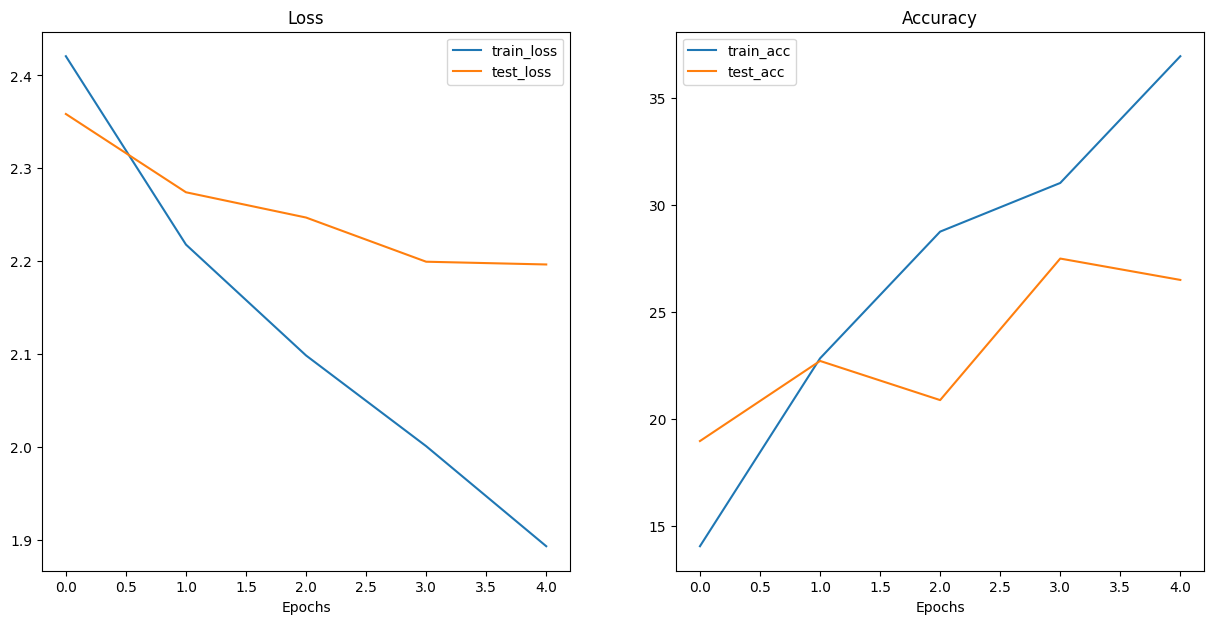

In [76]:
plot_loss_curves(model_0_results)

TinyVGG with data augmentation

In [83]:
from torchvision import transforms

train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(128,128)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform_trivial = transforms.Compose([
    transforms.Resize(size=(128,128)),
    transforms.ToTensor()
])

In [84]:
#Create train and test datasets and dataloaders with data augmentation
from torchvision import datasets
from torch.utils.data import DataLoader
import os

train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial)

test_data_augmented = datasets.ImageFolder(root=test_dir,
                                            transform=test_transform_trivial)

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_augmented = DataLoader(dataset=test_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=False,
                                        num_workers=NUM_WORKERS)

In [85]:
#Construct and train model_1

model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes)).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=8410, out_features=12, bias=True)
  )
)

In [86]:
NUM_EPOCHS = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

from timeit import default_timer as Timer
from helper_functions_2 import print_train_time
start_time = Timer()

model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_augmented,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        accuracy_fn=accuracy_fn,
                        epochs=NUM_EPOCHS,
                        device=device)

end_time = Timer()

print_train_time(start=start_time,
                 end=end_time,
                 device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Looked at 0/1872 samples.
Train Loss: 2.473 | Train Acc: 10.28%


 20%|██        | 1/5 [00:57<03:50, 57.56s/it]

Test Loss: 2.385 | Test Acc: 18.79%
Epoch: 0 | Train Loss: 2.4733 | Train Acc: 10.28 | Test Loss: 2.3852 | Test Acc: 18.79
Looked at 0/1872 samples.
Train Loss: 2.363 | Train Acc: 18.33%


 40%|████      | 2/5 [02:00<03:01, 60.64s/it]

Test Loss: 2.317 | Test Acc: 18.12%
Epoch: 1 | Train Loss: 2.3629 | Train Acc: 18.33 | Test Loss: 2.3171 | Test Acc: 18.12
Looked at 0/1872 samples.
Train Loss: 2.319 | Train Acc: 19.54%


 60%|██████    | 3/5 [03:08<02:07, 63.87s/it]

Test Loss: 2.299 | Test Acc: 18.25%
Epoch: 2 | Train Loss: 2.3187 | Train Acc: 19.54 | Test Loss: 2.2987 | Test Acc: 18.25
Looked at 0/1872 samples.
Train Loss: 2.278 | Train Acc: 21.72%


 80%|████████  | 4/5 [04:16<01:05, 65.80s/it]

Test Loss: 2.281 | Test Acc: 19.12%
Epoch: 3 | Train Loss: 2.2778 | Train Acc: 21.72 | Test Loss: 2.2806 | Test Acc: 19.12
Looked at 0/1872 samples.
Train Loss: 2.264 | Train Acc: 22.14%


100%|██████████| 5/5 [05:25<00:00, 65.20s/it]

Test Loss: 2.249 | Test Acc: 21.71%
Epoch: 4 | Train Loss: 2.2640 | Train Acc: 22.14 | Test Loss: 2.2492 | Test Acc: 21.71
Train time on cuda: 326.001 seconds


326.0007836999139

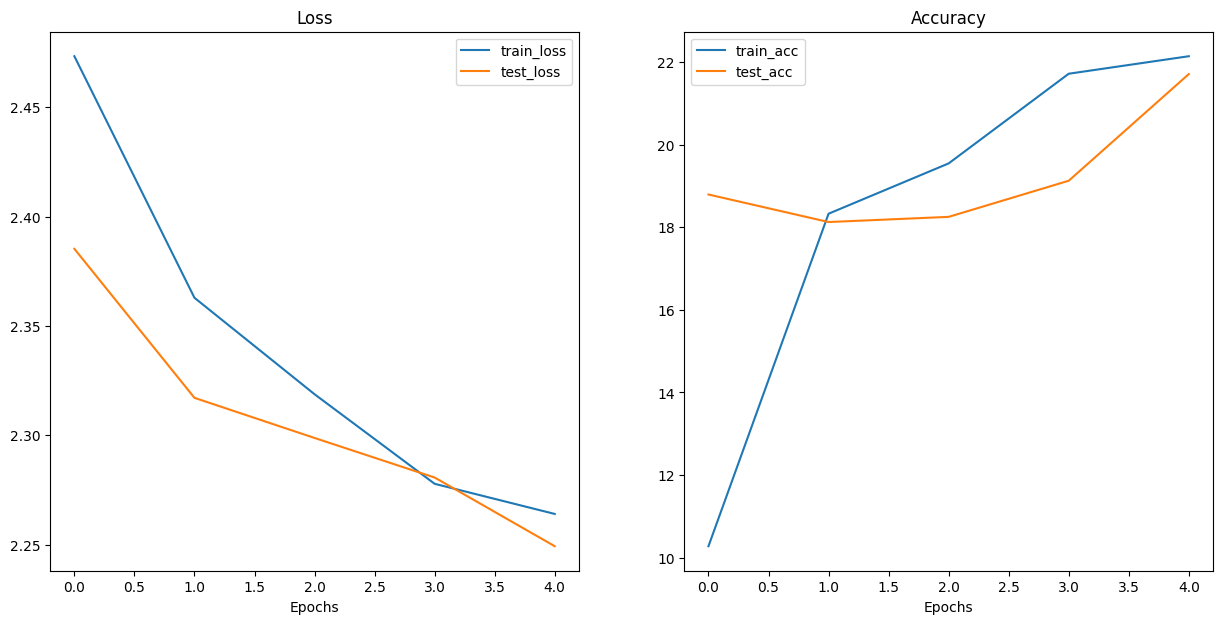

In [87]:
plot_loss_curves(model_1_results)

Prediction on images

In [88]:
import torchvision

def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device=device):
    #Load in the image
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    #Divide the image pixel values by 255 to get them between [0,1]
    target_image = target_image / 255
    #Transform if necessary
    if transform:
        target_image = transform(target_image)
    #Make sure the model is on target device
    model.to(device)
    #Turn on eval/inference mode and make a prediction
    model.eval()
    with torch.inference_mode():
        #Add an extra dimension to the image (this is the batch dimension, eg. our model will predict on batches of 1x image)
        target_image = target_image.unsqueeze(0)
        #Make a prediction on the image with an extra dimension
        target_image_pred = model(target_image.to(device)) #Make sure the target image is on the right device
    #Convert logits -> prediction probabilities
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
    #Convert prediction probabilities -> prediction labels
    target_image_pred_labels = torch.argmax(target_image_pred_probs, dim=1)
    #Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) #remove batch dimension and rearrange shape to be HWC
    if class_names:
        title = f"Pred: {class_names[target_image_pred_labels.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred:{target_image_pred_labels} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False)

In [91]:
# Create a new transform for prediction
prediction_transform = transforms.Compose([
    transforms.Resize((128, 128))
])

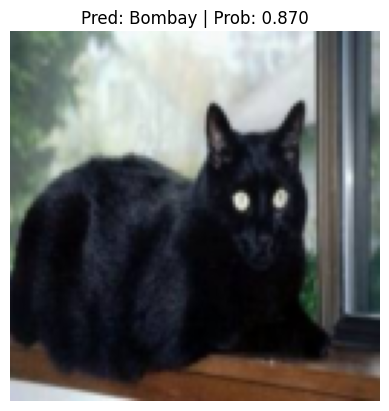

In [100]:
pred_and_plot_image(model=model_1,
                    image_path=r"C:\Users\lenovo\Downloads\Bombay.jpg",
                    class_names=class_names,
                    transform=prediction_transform,
                    device=device)